In [1]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Acoustic Extinguisher Fire Dataset

## Descripción del dataset:

- Disponible en el el siguiente enlace: [Acoustic Extinguisher Fire Dataset](https://www.kaggle.com/datasets/muratkokludataset/acoustic-extinguisher-fire-dataset)

**SHORT DESCRIPTION**: The dataset was obtained as a result of the extinguishing tests of four different fuel flames with a sound wave extinguishing system. The sound wave fire-extinguishing system consists of 4 subwoofers with a total power of 4,000 Watt placed in the collimator cabinet. There are two amplifiers that enable the sound come to these subwoofers as boosted. Power supply that powers the system and filter circuit ensuring that the sound frequencies are properly transmitted to the system is located within the control unit. While computer is used as frequency source, anemometer was used to measure the airflow resulted from sound waves during the extinguishing phase of the flame, and a decibel meter to measure the sound intensity. An infrared thermometer was used to measure the temperature of the flame and the fuel can, and a camera is installed to detect the extinction time of the flame. A total of 17,442 tests were conducted with this experimental setup. The experiments are planned as follows:
1. Three different liquid fuels and LPG fuel were used to create the flame.
2. 5 different sizes of liquid fuel cans are used to achieve different size of flames.
3. Half and full gas adjustment is used for LPG fuel.
4. While carrying out each experiment, the fuel container, at 10 cm distance, was moved forward up to 190 cm by increasing the distance by 10 cm each time.
5. Along with the fuel container, anemometer and decibel meter were moved forward in the same dimensions.
6. Fire extinguishing experiments was conducted with 54 different frequency sound waves at each distance and flame size.

Throughout the flame extinguishing experiments, the data obtained from each measurement device was recorded and a dataset was created. The dataset includes the features of fuel container size representing the flame size, fuel type, frequency, decibel, distance, airflow and flame extinction. Accordingly, 6 input features and 1 output feature will be used in models. The explanation of a total of seven features for liquid fuels in the dataset is given in Table 1, and the explanation of 7 features for LPG fuel is given in Table 2.
The status property (flame extinction or non-extinction states) can be predicted by using six features in the dataset. Status and fuel features are categorical, while other features are numerical. 8,759 of the 17,442 test results are the non-extinguishing state of the flame. 8,683 of them are the extinction state of the flame. According to these numbers, it can be said that the class distribution of the dataset is almost equal.				

#### Data properties and descriptions for liquid fuels

| **FEATURES** |       **MIN/MAX VALUES**      | **UNIT** |                             **DESCRIPTIONS**                             |
|:------------:|:-----------------------------:|:--------:|:------------------------------------------------------------------------:|
| SIZE         |       7, 12, 14, 16, 20       |    cm    | Recorded as 7 cm=1,   12 cm=2, 14 cm=3, 16 cm=4, 20 cm=5                 |
| FUEL         | Gasoline, Kerosene,   Thinner |          | Fuel type                                                                |
| DISTANCE     |            10 - 190           |    cm    |                                                                          |
| DESIBEL      |            72 - 113           |    dB    |                                                                          |
| AIRFLOW      |             0 - 17            |    m/s   |                                                                          |
| FREQUENCY    |              1-75             |    Hz    |                                                                          |
| STATUS       |              0, 1             |          | 0 indicates the   non-extinction state, 1 indicates the extinction state |

#### Data properties and descriptions for LPG

| **FEATURES** |               **MIN/MAX VALUES**               | **UNIT** |                             **DESCRIPTIONS**                             |
|:------------:|:----------------------------------------------:|:--------:|:------------------------------------------------------------------------:|
| SIZE         | Half throttle   setting, Full throttle setting |          | Reocerded as Half   throttle setting=6, Full throttle setting=7          |
| FUEL         |                       LPG                      |          | Fuel type                                                                |
| DISTANCE     |                    10 - 190                    |    cm    |                                                                          |
| DESIBEL      |                    72 - 113                    |    dB    |                                                                          |
| AIRFLOW      |                     0 - 17                     |    m/s   |                                                                          |
| FREQUENCY    |                      1-75                      |    Hz    |                                                                          |
| STATUS       |                      0, 1                      |          | 0   indicates the non-extinction state, 1 indicates the extinction state |

## Análisis preeliminar del dataset

In [2]:
df = pd.read_excel('data/Acoustic_Extinguisher_Fire_Dataset.xlsx')

In [3]:
# Visualizamos los primeros 5 registros
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


<AxesSubplot:ylabel='STATUS'>

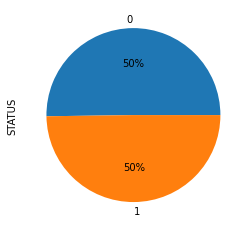

In [4]:
# Distribución de la variable de salida
df.STATUS.value_counts().plot.pie(autopct='%1.0f%%', figsize=(4,4))

In [5]:
# Visualizamos la forma del dataset
df.shape

(17442, 7)

In [6]:
# Obtenemos los estadísticos más importantes del dataset
df.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


In [7]:
# Obtenemos la cantidad de datos nulos
df.isna().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

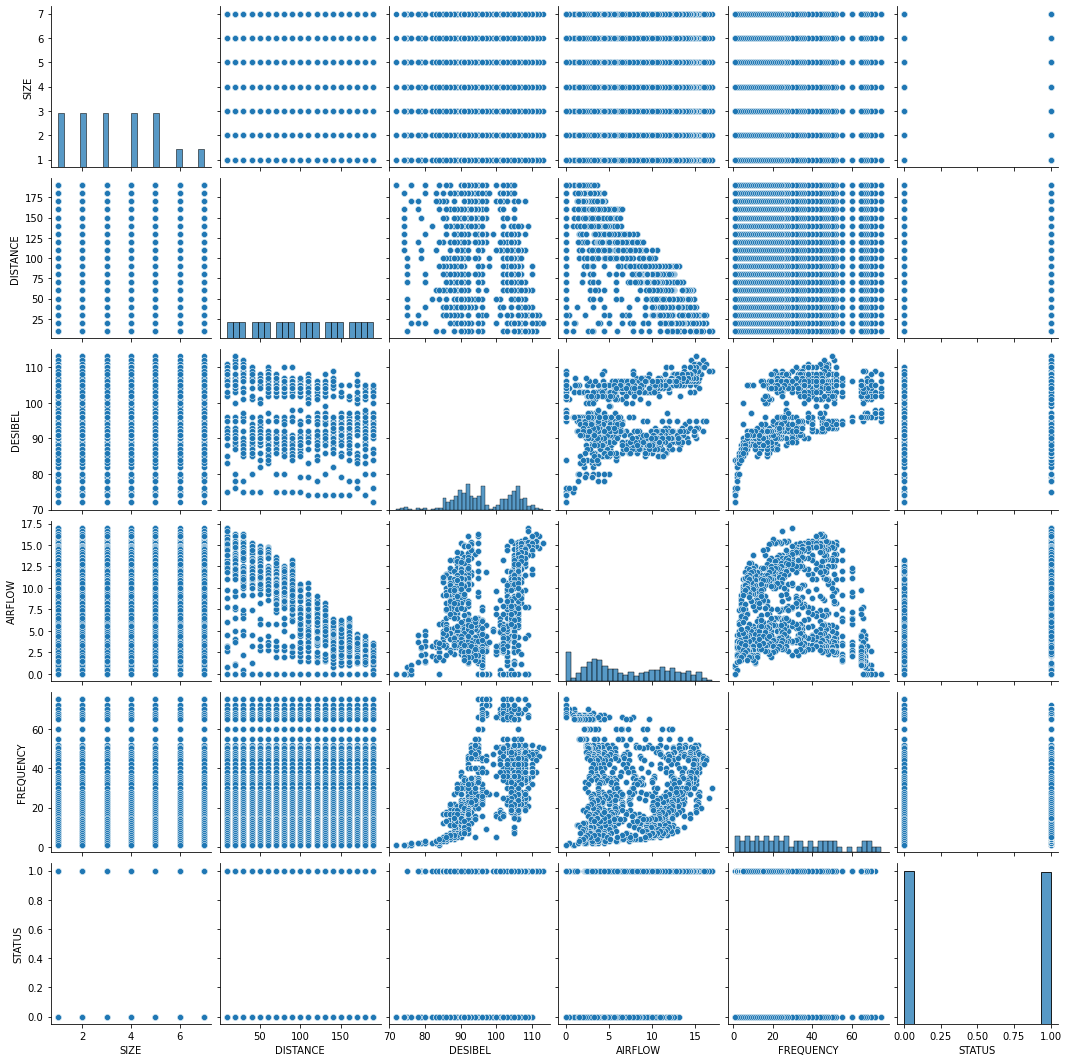

In [8]:
# Ploteamos la relaciones entre pares de variables del dataset
sns.pairplot(df)

### Conclusión:

El dataset incluye las siguientes características respecto a diferentes experimentos de extinción de incendios:
- tamaño de la llama (size)
- tipo de combustible (fuel)
- frecuencia del sonido producido por el fuego (frequency)
- decibeles producidos por el fuego (decibel)
- distancia del fuego (distance)
- flujo de aire (airflow)

A partir de dichas variables, el objetivo es utilizar diferentes modelos de aprenidizaje automático para intentar predecir la variable **STATUS**, la cual indica si el incendio ha sido extinto (1) o no (0).

### Citation

Yavuz Selim TASPINAR, Murat KOKLU and Mustafa ALTIN
CV:https://www.muratkoklu.com/en/publications/
DATASET: https://www.muratkoklu.com/datasets/
Citation Request :
1: KOKLU M., TASPINAR Y.S.,  (2021).  Determining the Extinguishing Status of Fuel Flames With Sound Wave by Machine Learning Methods.  IEEE Access, 9, pp.86207-86216, Doi: 10.1109/ACCESS.2021.3088612
Link: https://ieeexplore.ieee.org/document/9452168 (Open Access)
https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9452168

2: TASPINAR Y.S., KOKLU M., ALTIN M., (2021).  Classification of Flame Extinction Based on Acoustic Oscillations using Artificial Intelligence Methods.  Case Studies in Thermal Engineering, 28, 101561, Doi: 10.1016/j.csite.2021.101561
Link: https://www.sciencedirect.com/science/article/pii/S2214157X21007243  (Open Access) https://www.sciencedirect.com/sdfe/reader/pii/S2214157X21007243/pdf

3: TASPINAR Y.S., KOKLU M., ALTIN M., (2022).  Acoustic-Driven Airflow Flame Extinguishing System Design and Analysis of Capabilities of Low Frequency in Different Fuels.  Fire Technology, Doi: 10.1007/s10694-021-01208-9
Link: https://link.springer.com/content/pdf/10.1007/s10694-021-01208-9.pdf